In [1]:
import pandas as pd 
import urllib.request

In [2]:
def report(df,place=0):
    column_names = df.columns.to_list()
    row = df.iloc[place]
    for i in range(0,len(column_names)):
        print(column_names[i],':',row[i])

#### Загрузка таблицы

In [3]:
url = 'https://service.icecorp.ru/log_ttl_data/data.csv'
with urllib.request.urlopen(url) as response, open('data.csv', 'wb') as out_file:
    data = response.read() # a `bytes` object
    out_file.write(data)

In [4]:
df = pd.read_csv("data.csv",';')
df.fillna(0, inplace=True)

df.iloc()[2].ttl

len('14 995 922;28.07.2020 9:03:08;9636478085;partlist*a1595916186827b1595916187528c1595916187528d1595926986743e1595926987353f1595916188293g1595916188293g1595916188293h1595916187889i1595916187892j1595926988087;580')

len('14 995 948;28.07.2020 9:04:43;9031853536;masterlist*a1595916297482b1595916282113c1595916282113d1595927081286e1595927082427f1595916283361g1595916283361h1595916298847i1595916298847j1595927082645;589')

#### Определим время жизни пакетов

In [5]:
def get_len(last_string):
    try:
        splitters = ['*','a','b','c','d','e','f','g','h','i','j']
        ttl = []
        for splitter in splitters:
            new_string = last_string.split(splitter)
            last_string = new_string[1]
            ttl.append(new_string[0])
        ttl.append(last_string)
        first_value = int(ttl[2])
        last_value = int(ttl[-2:][0])
        return last_value-first_value
    except Exception as e:
        return 0
    

df['dev_len']=df['ttl'].apply(get_len)

report(df)

id : 15 102 661
date : 03.08.2020 0:00:22
phone : 9017976961
ttl : bidinfo*a1596402020677b1596402021327c1596402021327d1596412820479e1596412821760f1596402022700g1596402022700h1596402022233i1596402022242j1596412822041
AppVersion : 589
dev_len : 1565


#### Выделим функцию

In [6]:
def get_func(last_string):
    return last_string.split('*')[0]
df['func']=df['ttl'].apply(get_func)

report(df)

id : 15 102 661
date : 03.08.2020 0:00:22
phone : 9017976961
ttl : bidinfo*a1596402020677b1596402021327c1596402021327d1596412820479e1596412821760f1596402022700g1596402022700h1596402022233i1596402022242j1596412822041
AppVersion : 589
dev_len : 1565
func : bidinfo


#### Заполним таймеры этапов

In [7]:
def get_timers(last_string,step):
    try:
        splitters = ['*','a','b','c','d','e','f','g','h','i','j']
        ttl = []
        for splitter in splitters:
            new_string = last_string.split(splitter)
            last_string = new_string[1]
            ttl.append(new_string[0])
        ttl.append(last_string)    
        return int(ttl[step])/1000
    except Exception as e:
        return 0

timer_columns = ['a','b','c','d','e','f','g','h','i','j']
for i in range(0,len(timer_columns)):
    column_name = timer_columns[i]
    df[column_name]=df['ttl'].apply(get_timers,step=i+2)

report(df)

id : 15 102 661
date : 03.08.2020 0:00:22
phone : 9017976961
ttl : bidinfo*a1596402020677b1596402021327c1596402021327d1596412820479e1596412821760f1596402022700g1596402022700h1596402022233i1596402022242j1596412822041
AppVersion : 589
dev_len : 1565
func : bidinfo
a : 1596402020.677
b : 1596402021.327
c : 1596402021.327
d : 1596412820.479
e : 1596412821.76
f : 1596402022.7
g : 1596402022.7
h : 1596402022.233
i : 1596402022.242
j : 1596412822.041


#### Определим смещение по записи с минимальной длительностью в мс для каждого номера телефона

for phone in df.loc[df['AppVersion'] == 592]["phone"].unique():
    
    sel = df[df.phone==phone]
    sel = sel[sel.dev_len!=0]
    
    mr = sel[sel.phone==phone].sort_values(by=['dev_len']).iloc[0] #minimal delay record
    bias_top=(mr.h-mr.a-(mr.g-mr.b))/2-(mr.b-mr.a)
    bias_bottom=(mr.f+bias_top-(mr.c+bias_top)-(mr.e-mr.d))/2-(mr.d-(mr.c+bias_top))
    print(phone,mr.dev_len,bias_top,bias_bottom,mr.date)

In [8]:
for phone in df["phone"].unique():
    
    sel = df[df.phone==phone]
    sel = sel[sel.dev_len!=0]
    
    mr = sel[sel.phone==phone].sort_values(by=['dev_len']).iloc[0] #minimal delay record
    #mr = df[df.phone==phone].sort_values(by=['dev_len']).iloc[0] #minimal delay record
    
    bias_top=(mr.h-mr.a-(mr.g-mr.b))/2-(mr.b-mr.a)
    bias_bottom=(mr.f+bias_top-(mr.c+bias_top)-(mr.e-mr.d))/2-(mr.d-(mr.c+bias_top))
    df.loc[df['phone'] == phone, 'bias_top'] = bias_top
    df.loc[df['phone'] == phone, 'bias_bottom'] = bias_bottom

#### Вычислим время между инстанциями

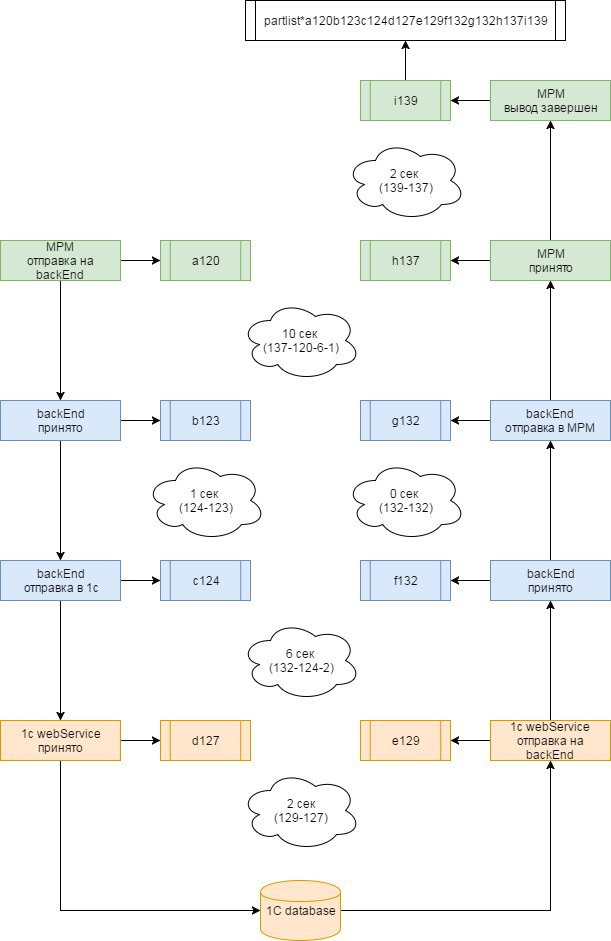

phone_selected = df[df.phone==9773971406]
phone_selected[phone_selected.dev_len!=0]

pd.DataFrame.where(cond=(df['A'] < 0) | (df['B'] > 0), self=df['A'] + df['B'], other=df['A'] / df['B'])

for i in df.loc[df.phone==9773971406]:#["dev_len"]:
    print(i.dev

sorted(df.loc[df.phone==9773971406]["dev_len"])

for dev_len in df.loc[df.phone==9773971406].["dev_len"]:
    print(i.dev_len)

for i in df.loc[df.phone==9773971406]:#['cd_back_to_1c']:#.sort_values(by=['dev_len'],ascending=False).iloc[0]
    print(i)

In [9]:
df['ab_mrm_to_back']      = df.b - df.a + df.bias_top    
df['bc_back_to_back']     = df.c - df.b
df['cd_back_to_1c']       = df.d - df.c + df.bias_bottom - df.bias_top
df['de_1c_to_1c']         = df.e - df.d
df['ef_1c_to_back']       = df.f - df.e + df.bias_top - df.bias_bottom
df['fg_back_to_back']     = df.g - df.f
df['gh_back_to_mrm']      = df.h - df.g - df.bias_top
df['hi_mrm_to_mrm']       = df.i - df.h

report(df,0)

id : 15 102 661
date : 03.08.2020 0:00:22
phone : 9017976961
ttl : bidinfo*a1596402020677b1596402021327c1596402021327d1596412820479e1596412821760f1596402022700g1596402022700h1596402022233i1596402022242j1596412822041
AppVersion : 589
dev_len : 1565
func : bidinfo
a : 1596402020.677
b : 1596402021.327
c : 1596402021.327
d : 1596412820.479
e : 1596412821.76
f : 1596402022.7
g : 1596402022.7
h : 1596402022.233
i : 1596402022.242
j : 1596412822.041
bias_top : -1.6179999113082886
bias_bottom : -10800.737500071526
ab_mrm_to_back : -0.968000054359436
bc_back_to_back : 0.0
cd_back_to_1c : 0.03250002861022949
de_1c_to_1c : 1.2809998989105225
ef_1c_to_back : 0.05950021743774414
fg_back_to_back : 0.0
gh_back_to_mrm : 1.150999903678894
hi_mrm_to_mrm : 0.009000062942504883


The kind of plot to produce:

‘line’ : line plot (default)

‘bar’ : vertical bar plot

‘barh’ : horizontal bar plot

‘hist’ : histogram

‘box’ : boxplot

‘kde’ : Kernel Density Estimation plot

‘density’ : same as ‘kde’

‘area’ : area plot

‘pie’ : pie plot

‘scatter’ : scatter plot

‘hexbin’ : hexbin plot.

#### График по операторам

In [10]:
df['oper']=(df.phone/10000000).apply(int)
df.oper.unique()

array([901, 926, 925, 927, 985, 916, 909, 977, 965, 906, 995, 905, 968,
       999, 903, 915, 910, 967, 980, 929, 964, 966, 963, 917, 958, 937,
       981, 919, 962, 961, 969])

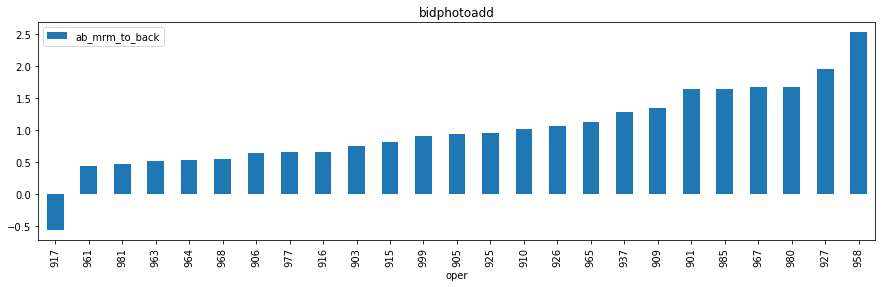

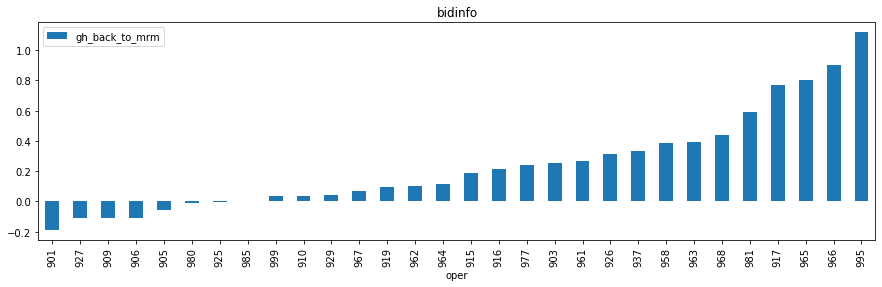

In [13]:
def plot_operators(df):
    
    # mrm to backend
    graphic = df[df.func=='bidphotoadd'].groupby('oper').median().sort_values('ab_mrm_to_back').plot(
        y=['ab_mrm_to_back'],
        kind='bar',
        title = 'bidphotoadd',
        figsize=(15,4)
    )
    fig = graphic.get_figure()
    fig.savefig("myplot.png")
    
    # backend to mrm
    graphic = df[df.func=='bidinfo'].groupby('oper').median().sort_values('gh_back_to_mrm').plot(
        y=['gh_back_to_mrm'],
        kind='bar',
        title = 'bidinfo',
        figsize=(15,4)
    )
    fig = graphic.get_figure()
    fig.savefig("myplot.png")
    
plot_operators(df)

#### График по версиям

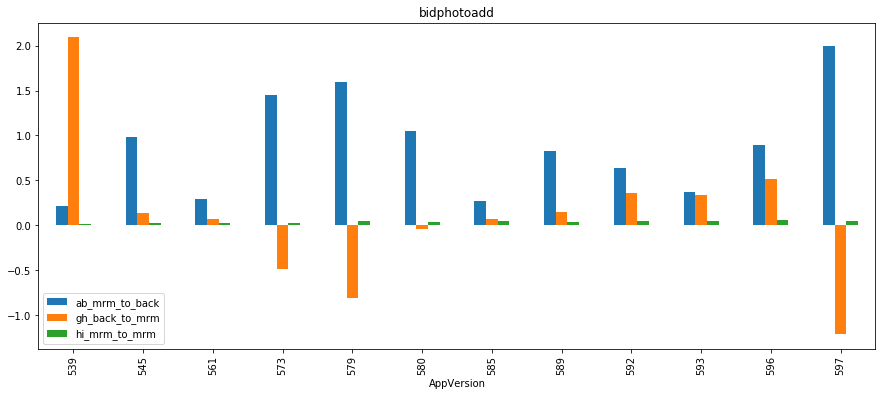

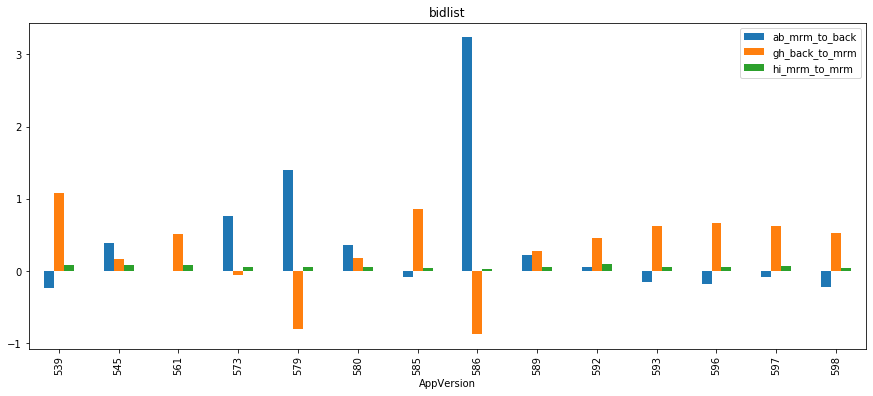

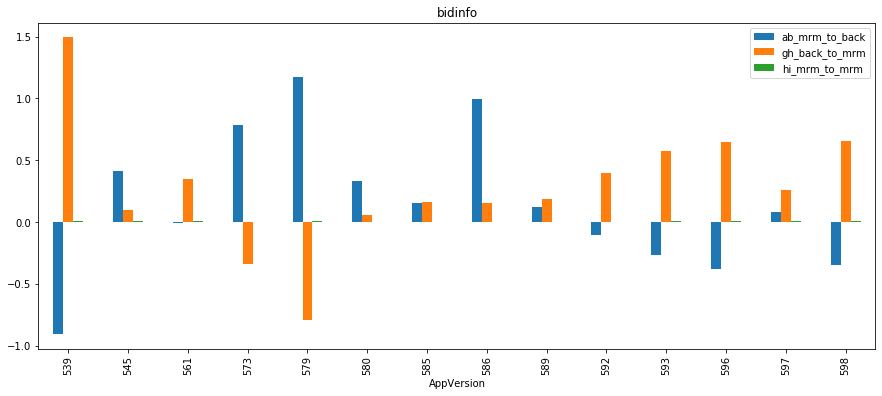

In [30]:
def plot_versions(df,func):
    #for func in df['func'].unique():
    graphic = df[df.func==func].groupby('AppVersion').median().plot(
        y=[
            'ab_mrm_to_back',
            'gh_back_to_mrm',
            'hi_mrm_to_mrm'
        ],
        kind='bar',
        title = func,
        #subplots=True,
        figsize=(15,6),
    )
    fig = graphic.get_figure()
    fig.savefig("myplot.png")

plot_versions(df,'bidphotoadd')
plot_versions(df,'bidlist')
plot_versions(df,'bidinfo')

#### График по датам

In [31]:
df['day'] = df['date'].str.split().str[0]

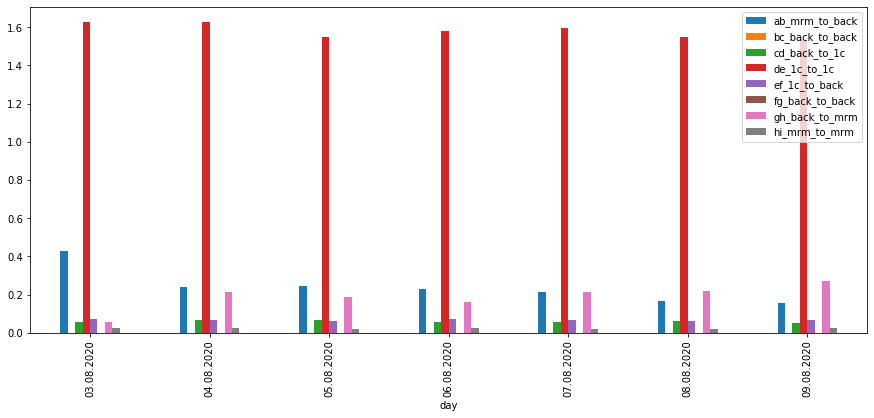

In [33]:
def plot_dates(df):
    #for func in df['func'].unique():
        #graphic = df[df.func==func].groupby('AppVersion').median().plot(
    graphic = df.groupby('day').median().plot(        
        y=[
            'ab_mrm_to_back',
            'bc_back_to_back',
            'cd_back_to_1c',
            'de_1c_to_1c',
            'ef_1c_to_back',
            'fg_back_to_back',
            'gh_back_to_mrm',
            'hi_mrm_to_mrm',
        ],
        kind='bar',
        #title = func,
        #subplots=True,
        figsize=(15,6)
    )
    fig = graphic.get_figure()
    fig.savefig("myplot.png")
plot_dates(df)